# Population Optogenetic Analysis

Jupyter Notebook implementation of population optogenetic analysis. Determines if neurons were significantly activated by direct optogenetic stimulation

In [1]:
import os
import utilities as utils
import pop_opto_analysis as opto_anal
import pop_opto_curve as power_curve
import save_load_pickle as lp
%matplotlib notebook

In [12]:
# Load some pickled data
## list of the file names to be loaded
os.chdir(r'C:\Users\Jake\Desktop\Processed_data')
b_fnames = ['JW011_211105_Behavior_8mW',
           'JW011_211105_Behavior_10mW','JW011_211105_Behavior_15mW','JW011_211105_Behavior_20mW',
           'JW011_211105_Behavior_25mW']
i_fnames = ['JW011_211105_Summary_8mW',
           'JW011_211105_Summary_10mW','JW011_211105_Summary_15mW','JW011_211105_Summary_20mW',
           'JW011_211105_Summary_25mW']
## Path if data is not in the same folder. Comment out otherwise
path = 'python_data'
i_data = lp.load_pickle(i_fnames,path)
b_data  = lp.load_pickle(b_fnames,path)


## Power Curve

Visualize the change in activity induced by optogenetic stimulation and the percentage of neurons significantly modulated for different stimulation powers

C:\Users\Jake\Documents\Anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Jake\Documents\Anaconda3\lib\site-packages\numpy\core\_methods.py:251: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
C:\Users\Jake\Desktop\python_code\Lab_Analyses\pop_opto_curve.py:132: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.sem_diffs = np.array(sem_diffs)


<IPython.core.display.Javascript object>


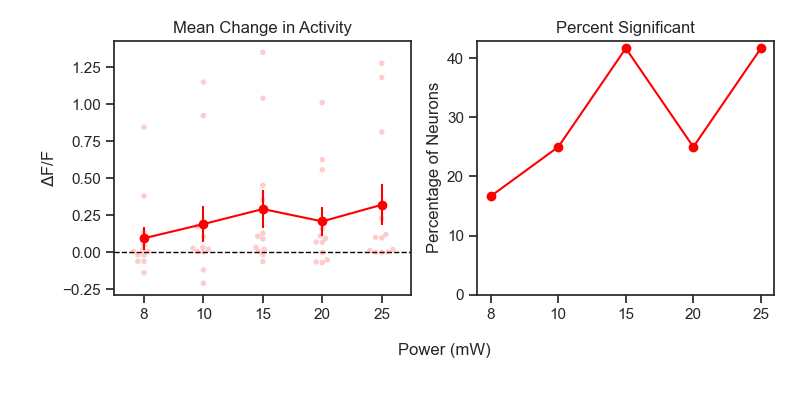

In [23]:
# specify which method you want to use to assess if neuron was significantly activated
# 'test' uses wilcoxon signed-rank tet and 'shuff' compares against a shuffled distribution of activity
# specify if you would like to use z_scored data for not
curve = power_curve.pop_opto_curve(imaging_data=i_data,behavioral_data=b_data,powers=[8,10,15,20,25],method='shuff',zscore=False)
curve.get_power_curves()

In [24]:
# Display results
curve.disp_results()

One-Way ANOVA results
F statistic:  0.6034891378349287 
p value:  0.661741968365761


Bonferroni Posttest Results
╒════════════════╤═══════════╤════════════════╤═══════════════════╕
│ comparison     │    t stat │   raw p-values │   adjusted p-vals │
╞════════════════╪═══════════╪════════════════╪═══════════════════╡
│ 8 mW vs.10 mW  │ -0.672904 │       0.508016 │                 1 │
├────────────────┼───────────┼────────────────┼───────────────────┤
│ 8 mW vs.15 mW  │ -1.29652  │       0.208233 │                 1 │
├────────────────┼───────────┼────────────────┼───────────────────┤
│ 8 mW vs.20 mW  │ -0.909831 │       0.372773 │                 1 │
├────────────────┼───────────┼────────────────┼───────────────────┤
│ 8 mW vs.25 mW  │ -1.41914  │       0.169871 │                 1 │
├────────────────┼───────────┼────────────────┼───────────────────┤
│ 10 mW vs.15 mW │ -0.574053 │       0.571755 │                 1 │
├────────────────┼───────────┼────────────────┼───────────────────┤
│ 

### Visualize Individual sessions

<IPython.core.display.Javascript object>


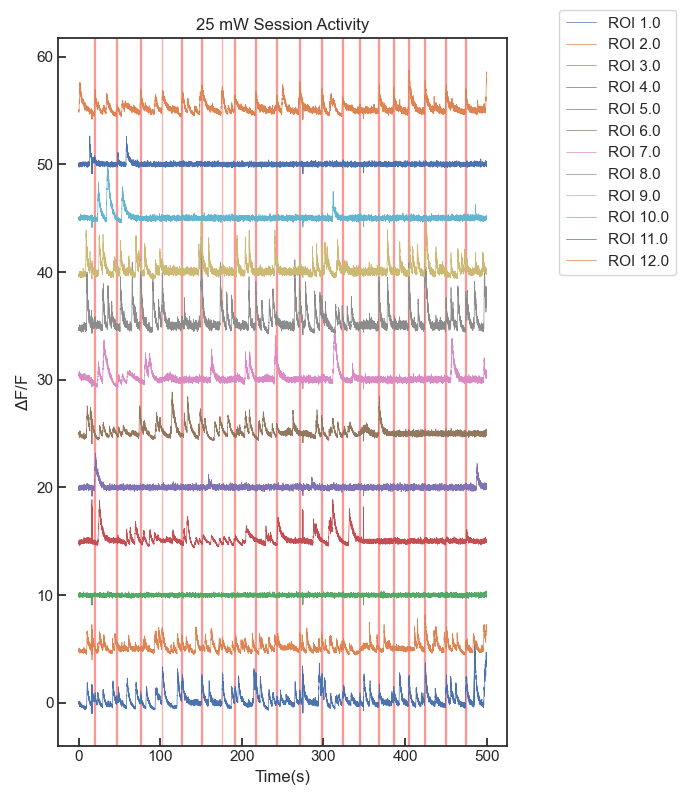

<IPython.core.display.Javascript object>


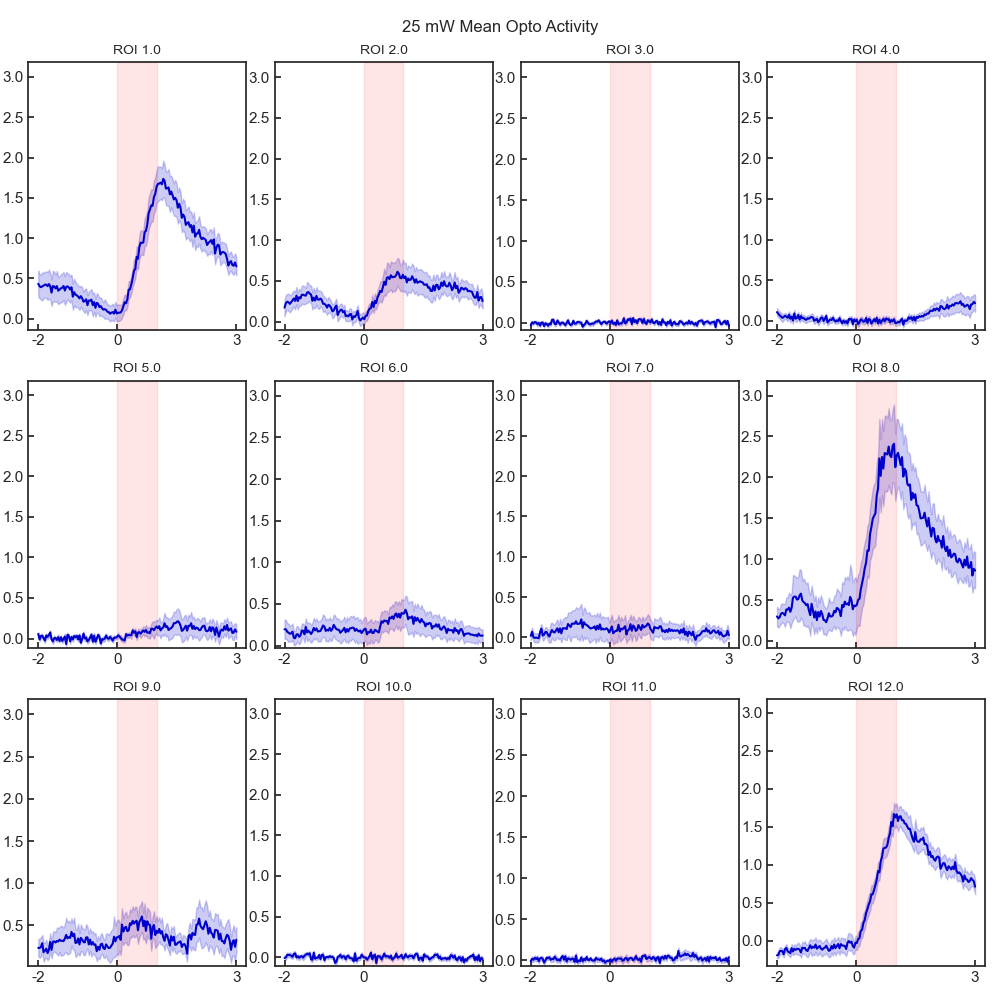

<IPython.core.display.Javascript object>


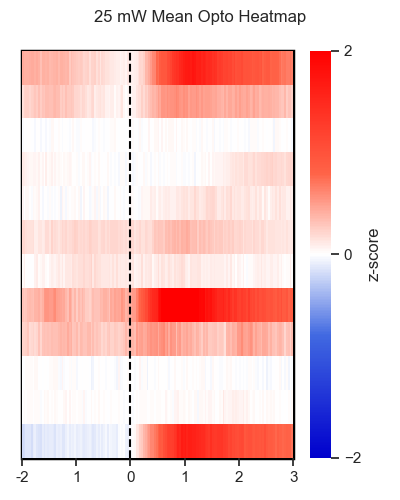

<IPython.core.display.Javascript object>


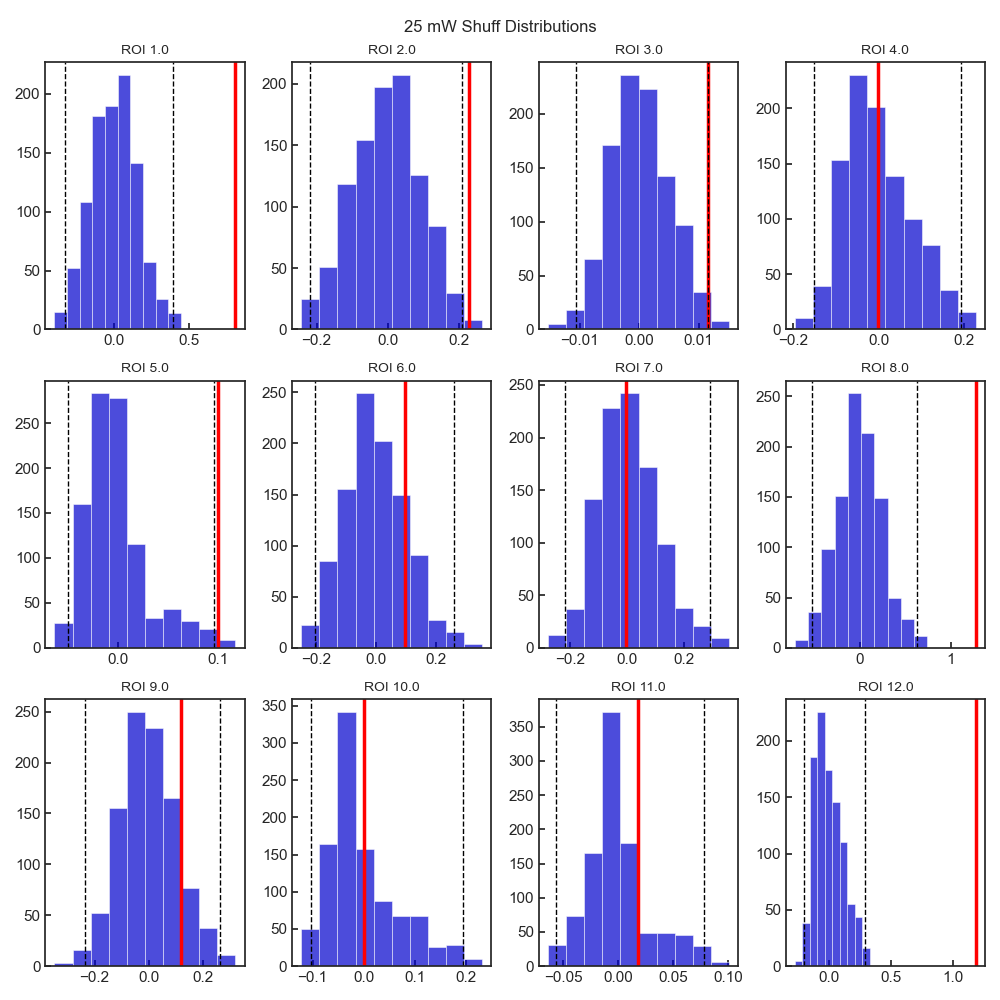

,real_diff,bounds,sig
ROI 1.0,0.812097,"(0.39187885869672123, -0.32578376272662923)",1
ROI 2.0,0.228091,"(0.20934510130370435, -0.21793077307340428)",1
ROI 3.0,0.011555,"(0.01156754898149276, -0.010616059757555951)",0
ROI 4.0,-0.001347,"(0.19360887656825207, -0.15112970121545563)",0
ROI 5.0,0.099814,"(0.096614966166643, -0.05123042503150606)",1
ROI 6.0,0.096598,"(0.2585805337181209, -0.2022309302989893)",0
ROI 7.0,-0.001297,"(0.29176190398218915, -0.21765345065086092)",0
ROI 8.0,1.277401,"(0.6259998584127645, -0.5249719458222546)",1
ROI 9.0,0.119183,"(0.26227986034380446, -0.2337808775249349)",0
ROI 10.0,-0.000051,"(0.1942356724729138, -0.1029305605118556)",0


In [26]:
# Specify which session you wish to visualize
curve.visualize_individual_sessions(4)